In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
import pandas as pd
from arrakis_nd import *
from scipy.cluster import hierarchy
import h5py


In [2]:
flow_file = h5py.File('/global/homes/n/ncarrara/dune/MiniRun5_1E19_RHC.flow.0000000.FLOW.hdf5')
arrakis_file = h5py.File('/global/homes/n/ncarrara/scratch/MiniRun5_1E19_RHC.arrakis.0000000.ARRAKIS.hdf5')


interactions = flow_file["mc_truth/interactions/data"]
interactions_event_id = interactions["event_id"]
interactions_vertex_id = interactions["vertex_id"]
trajectories = flow_file["mc_truth/trajectories/data"]
trajectories_event_id = trajectories['event_id']
trajectories_traj_id = trajectories['traj_id']
trajectories_vertex_it = trajectories['vertex_id']


In [3]:

charge = flow_file['charge/calib_final_hits/data']
charge_backtrack = flow_file['mc_truth/calib_final_hit_backtrack/data']
arrakis_charge = arrakis_file['charge/calib_final_hits/data']
arrakis_segment_charge = arrakis_file['charge_segment/calib_final_hits/data']
arrakis_tracklettes = arrakis_file['standard_record/tracklette']
arrakis_tracks = arrakis_file['standard_record/track']
arrakis_fragments = arrakis_file['standard_record/fragment']
arrakis_showers = arrakis_file['standard_record/shower']
arrakis_blips = arrakis_file['standard_record/blip']
arrakis_neutrino_events = arrakis_file['standard_record/neutrino_event']

arrakis_neutrino = arrakis_file['standard_record/neutrino']
events = np.unique(arrakis_charge['event_id'])
event = events[15]
print(event)
event_mask = (arrakis_charge['event_id'] == event)
event_tracklette_mask = (arrakis_tracklettes['event_id'] == event)
event_track_mask = (arrakis_tracks['event_id'] == event)
event_fragment_mask = (arrakis_fragments['event_id'] == event)
event_shower_mask = (arrakis_showers['event_id'] == event)
event_blip_mask = (arrakis_blips['event_id'] == event)
event_neutrino_event_mask = (arrakis_neutrino_events['event_id'] == event)

charge_event = charge[event_mask]
tracklette_event = arrakis_tracklettes[event_tracklette_mask]
track_event = arrakis_tracks[event_track_mask]
fragment_event = arrakis_fragments[event_fragment_mask]
shower_event = arrakis_showers[event_shower_mask]
blip_event = arrakis_blips[event_blip_mask]
neutrino_event = arrakis_neutrino_events[event_neutrino_event_mask]

charge_backtrack_event = charge_backtrack[event_mask]
arrakis_event = arrakis_charge[event_mask]
physics_labels = {
    -1: 'undefined',
    0: 'noise',
    1: 'mip',
    2: 'hip',
    3: 'e_ionization',
    4: 'delta',
    5: 'michel',
    6: 'compton',
    7: 'conversion',
    8: 'nr',
    9: 'er'
}
topology_labels = {
    -1: 'undefined',
    0: 'noise',
    1: 'track',
    2: 'shower',
    3: 'blip'
}
shower_labels = {
    -1: 'undefined',
    0: 'noise',
    1: 'electromagnetic',
    2: 'pion_0_decay',
    3: 'pion_plus_decay',
    4: 'pion_minus_decay',
    5: 'kaon_0_decay',
    6: 'kaon_short_decay',
    7: 'kaon_long_decay',
    8: 'kaon_plus_decay',
    9: 'kaon_minus_decay',
    10: 'd_0_decay',
    11: 'd_plus_decay',
    12: 'd_minus_decay',
    13: 'lambda_decay',
    14: 'sigma_0_decay',
    15: 'sigma_plus_decay',
    16: 'sigma_minus_decay'
}

17


In [4]:
neutrino_event

array([(17, -1, 0)],
      dtype=[('event_id', '<i4'), ('neutrino_type', '<i4'), ('fiducialized', '<i4')])

In [5]:

event_x = charge_event['x']
event_y = charge_event['y']
event_z = charge_event['z']
event_Q = charge_event['Q']

event_topology = arrakis_event['topology']
event_particle = arrakis_event['particle']
event_physics = arrakis_event['physics']
event_unique_topology = arrakis_event['unique_topology']
event_tracklette_begin = arrakis_event['tracklette_begin']
event_tracklette_end = arrakis_event['tracklette_end']
event_fragment_begin = arrakis_event['fragment_begin']
event_fragment_end = arrakis_event['fragment_end']
event_vertex = arrakis_event['vertex']


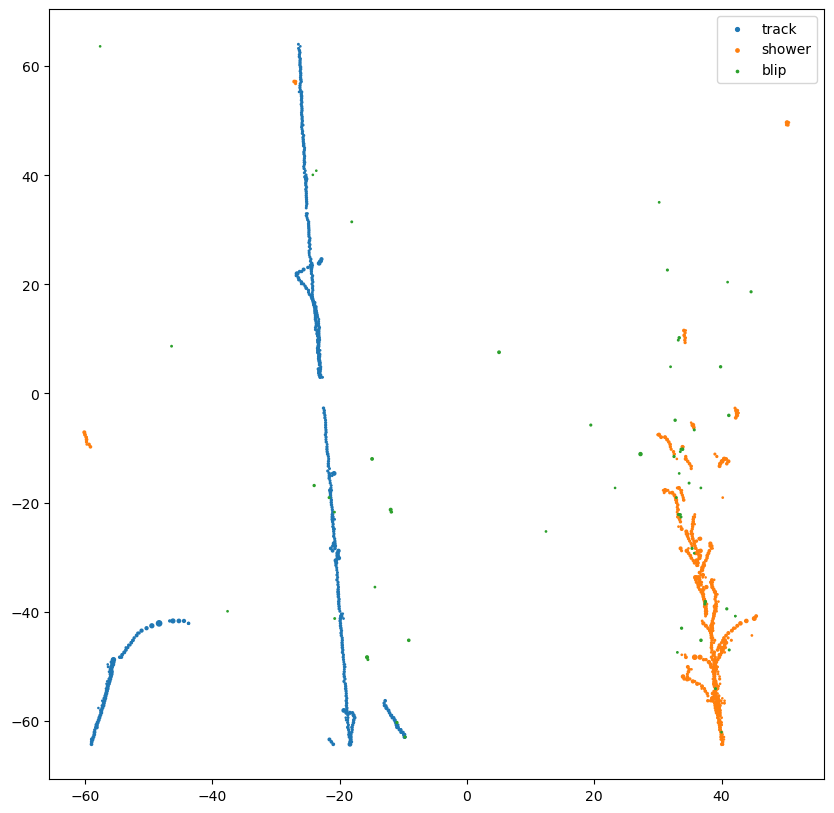

In [6]:
tracks = np.any(event_topology == 1).astype(int)
fig, axs = plt.subplots(figsize=(10,10))
for label in np.unique(event_topology):
    # if label != 5:
    #     continue
    axs.scatter(
        event_x[(event_topology == label)],
        event_z[(event_topology == label)],
        label=topology_labels[label],
        s=event_Q[(event_topology == label)] / 10
    )
# axs.scatter(
#     event_x[(event_tracklette_begin == 1)],
#     event_z[(event_tracklette_begin == 1)],
#     label='track_begin'
# )
# axs.scatter(
#     event_x[(event_tracklette_end == 1)],
#     event_z[(event_tracklette_end == 1)],
#     label='track_end'
# )
# axs.scatter(
#     event_x[(event_fragment_begin == 1)],
#     event_z[(event_fragment_begin == 1)],
#     label='fragment_begin'
# )
# axs.scatter(
#     event_x[(event_fragment_end == 1)],
#     event_z[(event_fragment_end == 1)],
#     label='fragment_end'
# )
# axs.scatter(
#     event_x[(event_vertex == 1)],
#     event_z[(event_vertex == 1)],
#     label='vertex'
# )
plt.legend()

In [8]:
tracklette_topology = tracklette_event['truth'][:, 0]

fragment_topology = fragment_event['truth'][:, 0]
shower_ids = shower_event['shower_id']
shower_types = shower_event['shower_type']
shower_length = shower_event['len_gcm2']
shower_width = shower_event['width']
shower_angle = shower_event['angle']
shower_xyz_start = shower_event['start']

blip_topology = blip_event['truth'][:, 0]


fig, axs = plt.subplots(figsize=(10,10))
for label in np.unique(tracklette_topology):
    # if label != -1:
    #     continue
    # axs.scatter(
    #     event_x[(event_unique_topology == label)],
    #     event_z[(event_unique_topology == label)],
    #     # label=label,
    #     s=event_Q[(event_unique_topology == label)] / 10
    # )
for ii, shower in enumerate(shower_ids):
    shower_fragment = [
        fragment_event['fragment_id'][ii]
        for ii in range(len(fragment_event))
        if fragment_event['ancestor_id'][ii] == shower
    ]
    shower_blip = [
        blip_event['blip_id'][ii]
        for ii in range(len(blip_event))
        if blip_event['ancestor_id'][ii] == shower
    ]

    fragment_x = []
    fragment_y = []
    fragment_z = []
    fragment_Q = []
    for fragment in shower_fragment:
        if fragment == -1:
            break
        fragment_id = fragment_topology[np.where(fragment_event['fragment_id'] == fragment)[0]][0]
        
        topology_mask = event_unique_topology == fragment_id[0]
        
        fragment_x.append(event_x[topology_mask])
        fragment_y.append(event_y[topology_mask])
        fragment_z.append(event_z[topology_mask])
        fragment_Q.append(event_Q[topology_mask] / 10)
    fragment_x = np.concatenate(fragment_x)
    fragment_y = np.concatenate(fragment_y)
    fragment_z = np.concatenate(fragment_z)
    fragment_Q = np.concatenate(fragment_Q)
    axs.scatter(
        fragment_x,
        fragment_z,
        s=fragment_Q,
        label=f"{shower_labels[shower_types[ii]]},{shower_length},{shower_width},{shower_angle}"
    )
    
    blip_x = []
    blip_y = []
    blip_z = []
    blip_Q = []
    for blip in shower_blip:
        if blip == -1:
            break
        blip_id = blip_topology[np.where(blip_event['blip_id'] == blip)[0]][0]
        
        topology_mask = event_unique_topology == blip_id[0]
        
        blip_x.append(event_x[topology_mask])
        blip_y.append(event_y[topology_mask])
        blip_z.append(event_z[topology_mask])
        blip_Q.append(event_Q[topology_mask] / 10)
    blip_x = np.concatenate(blip_x)
    blip_y = np.concatenate(blip_y)
    blip_z = np.concatenate(blip_z)
    blip_Q = np.concatenate(blip_Q)
    axs.scatter(
        blip_x,
        blip_z,
        s=blip_Q,
        label=shower_labels[shower_types[ii]]
    )
    # axs.scatter(
    #     shower_xyz_start[ii][0][0],
    #     shower_xyz_start[ii][0][2],
    #     marker='x',
    #     color='k'
    # )
plt.legend()


IndentationError: expected an indented block after 'for' statement on line 15 (2940159160.py, line 24)

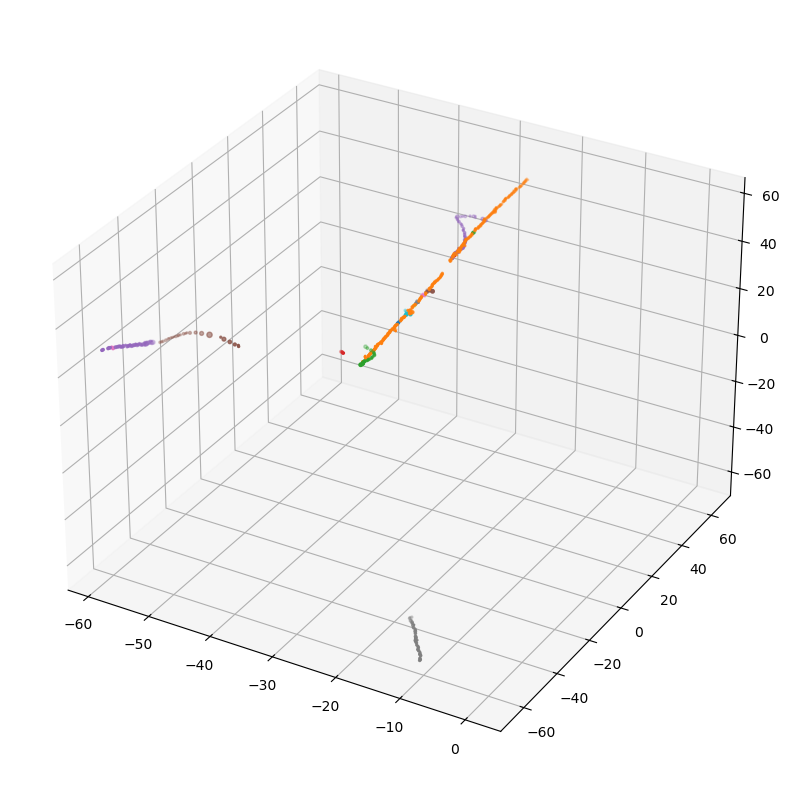

In [8]:
tracklette_topology = tracklette_event['truth'][:, 0]

fig = plt.figure(figsize=(10,10))
axs = fig.add_subplot(projection='3d')
for label in np.unique(tracklette_topology):
    # if label != -1:
    #     continue
    axs.scatter(
        event_x[(event_unique_topology == label)],
        event_z[(event_unique_topology == label)],
        event_y[(event_unique_topology == label)],
        label=label,
        s=event_Q[(event_unique_topology == label)] / 10
    )

In [9]:
shower_fragments = shower_event['fragment_ids']
fragment_topology = fragment_event['truth'][:, 0]
shower_ids = shower_event['shower_id']
shower_types = shower_event['shower_type']

fig, axs = plt.subplots(figsize=(10,10))
for ii, shower in enumerate(shower_ids):
    shower_fragment = shower_fragments[ii][0]
    fragment_x = []
    fragment_y = []
    fragment_z = []
    fragment_Q = []
    for fragment in shower_fragment:
        if fragment == -1:
            break
        fragment_id = fragment_topology[np.where(fragment_event['fragment_id'] == fragment)[0]][0]
        
        topology_mask = event_unique_topology == fragment_id[0]
        
        fragment_x.append(event_x[topology_mask])
        fragment_y.append(event_y[topology_mask])
        fragment_z.append(event_z[topology_mask])
        fragment_Q.append(event_Q[topology_mask] / 10)
    fragment_x = np.concatenate(fragment_x)
    fragment_y = np.concatenate(fragment_y)
    fragment_z = np.concatenate(fragment_z)
    fragment_Q = np.concatenate(fragment_Q)
    axs.scatter(
        fragment_x,
        fragment_z,
        s=fragment_Q,
        label=shower_labels[shower_types[ii]]
    )
plt.legend()

ValueError: no field of name fragment_ids

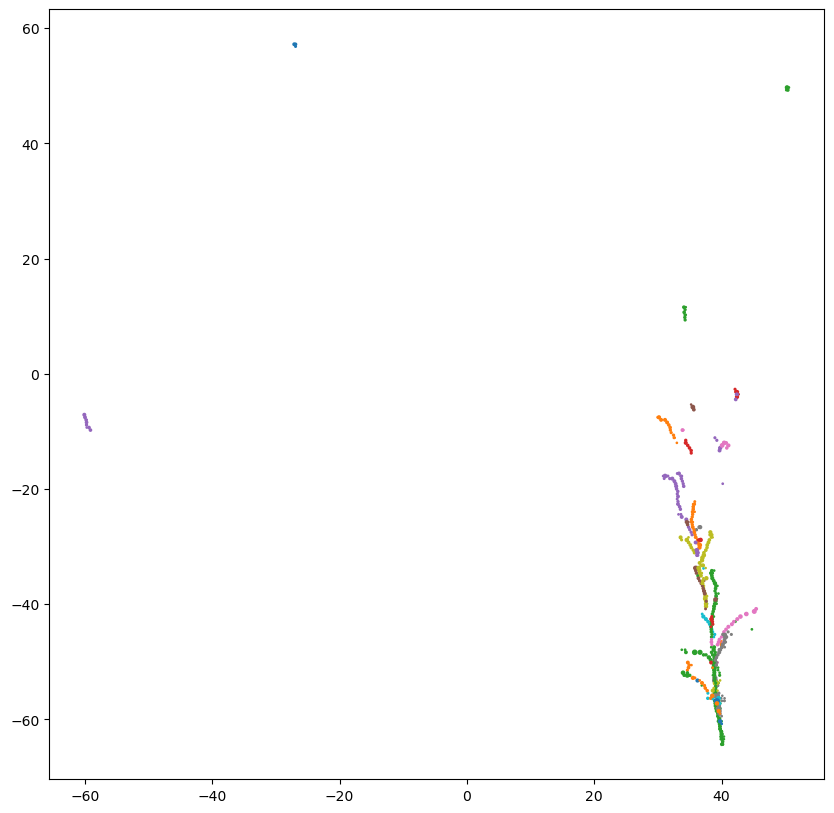

In [10]:
fragment_topology = fragment_event['truth'][:, 0]

fig, axs = plt.subplots(figsize=(10,10))
for label in np.unique(fragment_topology):
    # if label != -1:
    #     continue
    axs.scatter(
        event_x[(event_unique_topology == label)],
        event_z[(event_unique_topology == label)],
        label=label,
        s=event_Q[(event_unique_topology == label)] / 10
    )

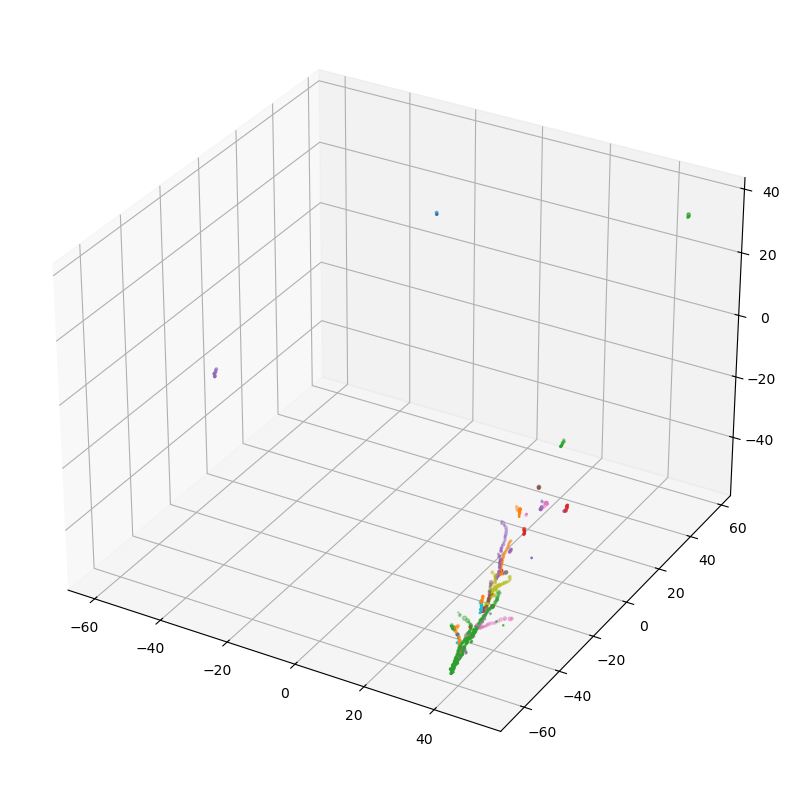

In [11]:
fragment_topology = fragment_event['truth'][:, 0]

fig = plt.figure(figsize=(10,10))
axs = fig.add_subplot(projection='3d')
for label in np.unique(fragment_topology):
    # if label != -1:
    #     continue
    axs.scatter(
        event_x[(event_unique_topology == label)],
        event_z[(event_unique_topology == label)],
        event_y[(event_unique_topology == label)],
        label=label,
        s=event_Q[(event_unique_topology == label)] / 10
    )

In [12]:
shower_fragments = shower_event['fragment_ids']
fragment_topology = fragment_event['truth'][:, 0]
shower_ids = shower_event['shower_id']
shower_types = shower_event['shower_type']

fig = plt.figure(figsize=(10,10))
axs = fig.add_subplot(projection='3d')
for ii, shower in enumerate(shower_ids):
    shower_fragment = shower_fragments[ii][0]
    fragment_x = []
    fragment_y = []
    fragment_z = []
    for fragment in shower_fragment:
        if fragment == -1:
            break
        fragment_id = fragment_topology[np.where(fragment_event['fragment_id'] == fragment)[0]][0]
        
        topology_mask = event_unique_topology == fragment_id[0]
        
        fragment_x.append(event_x[topology_mask])
        fragment_y.append(event_y[topology_mask])
        fragment_z.append(event_z[topology_mask])
    fragment_x = np.concatenate(fragment_x)
    fragment_y = np.concatenate(fragment_y)
    fragment_z = np.concatenate(fragment_z)
    axs.scatter(
        fragment_x,
        fragment_z,
        fragment_y,
        label=shower_types[ii]
    )
plt.legend()
    
    

ValueError: no field of name fragment_ids

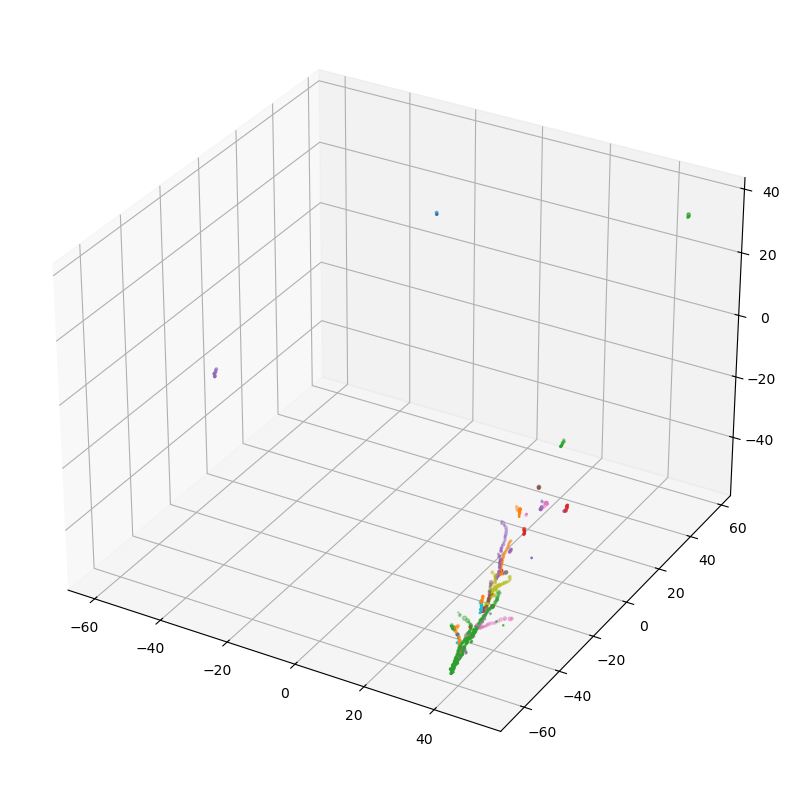

In [13]:
fragment_topology = fragment_event['truth'][:, 0]

fig = plt.figure(figsize=(10,10))
axs = fig.add_subplot(projection='3d')
for label in np.unique(fragment_topology):
    # if label != -1:
    #     continue
    axs.scatter(
        event_x[(event_unique_topology == label)],
        event_z[(event_unique_topology == label)],
        event_y[(event_unique_topology == label)],
        label=label,
        s=event_Q[(event_unique_topology == label)] / 10
    )

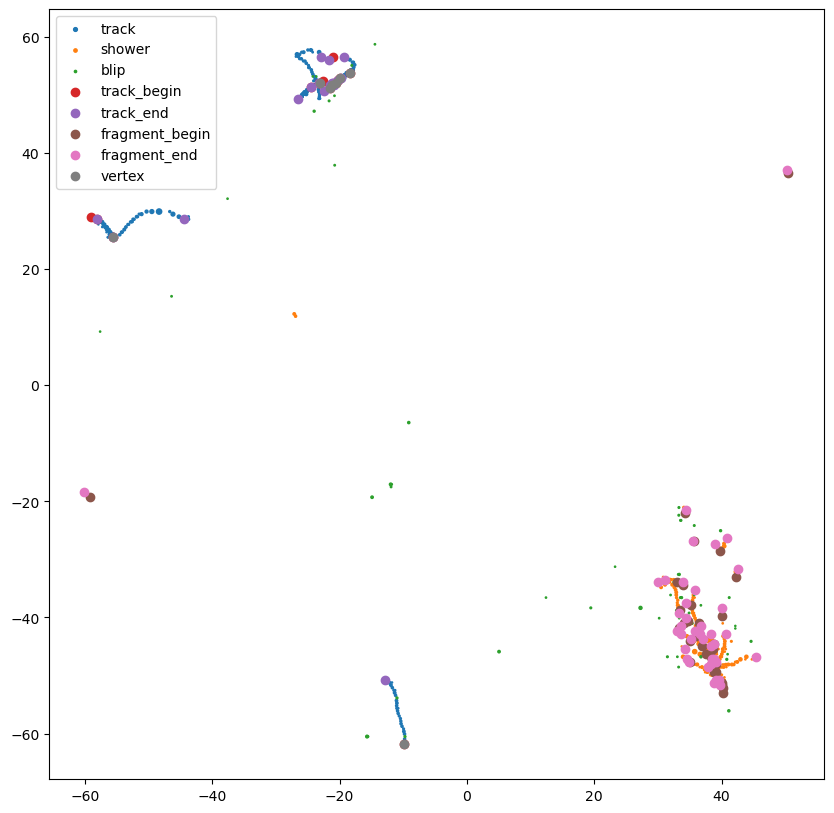

In [14]:
tracks = np.any(event_topology == 1).astype(int)
fig, axs = plt.subplots(figsize=(10,10))
for label in np.unique(event_topology):
    axs.scatter(
        event_x[(event_topology == label)],
        event_y[(event_topology == label)],
        label=topology_labels[label],
        s=event_Q[(event_topology == label)] / 10
    )
axs.scatter(
    event_x[(event_tracklette_begin == 1)],
    event_y[(event_tracklette_begin == 1)],
    label='track_begin'
)
axs.scatter(
    event_x[(event_tracklette_end == 1)],
    event_y[(event_tracklette_end == 1)],
    label='track_end'
)
axs.scatter(
    event_x[(event_fragment_begin == 1)],
    event_y[(event_fragment_begin == 1)],
    label='fragment_begin'
)
axs.scatter(
    event_x[(event_fragment_end == 1)],
    event_y[(event_fragment_end == 1)],
    label='fragment_end'
)
axs.scatter(
    event_x[(event_vertex == 1)],
    event_y[(event_vertex == 1)],
    label='vertex'
)
# axs.set_xlim([-25,-10])
plt.legend()

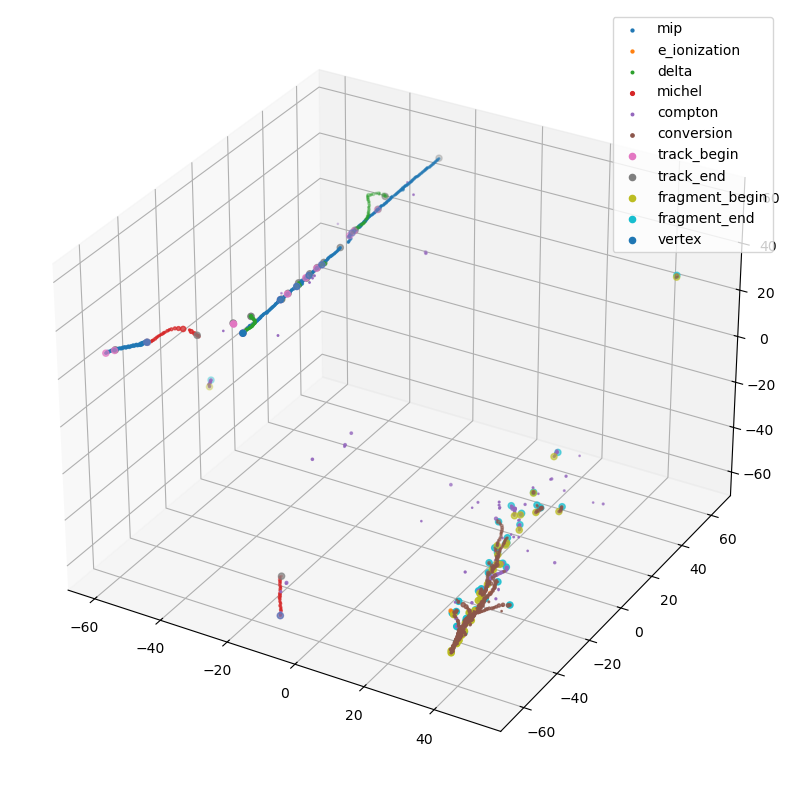

In [15]:
fig = plt.figure(figsize=(10,10))
axs = fig.add_subplot(projection='3d')
for label in np.unique(event_physics):
    axs.scatter(
        event_x[(event_physics == label)],
        event_z[(event_physics == label)],
        event_y[(event_physics == label)],
        label=physics_labels[label],
        s=event_Q[(event_physics == label)] / 10
    )
axs.scatter(
    event_x[(event_tracklette_begin == 1)],
    event_z[(event_tracklette_begin == 1)],
    event_y[(event_tracklette_begin == 1)],
    label='track_begin'
)
axs.scatter(
    event_x[(event_tracklette_end == 1)],
    event_z[(event_tracklette_end == 1)],
    event_y[(event_tracklette_end == 1)],
    label='track_end'
)
axs.scatter(
    event_x[(event_fragment_begin == 1)],
    event_z[(event_fragment_begin == 1)],
    event_y[(event_fragment_begin == 1)],
    label='fragment_begin'
)
axs.scatter(
    event_x[(event_fragment_end == 1)],
    event_z[(event_fragment_end == 1)],
    event_y[(event_fragment_end == 1)],
    label='fragment_end'
)
axs.scatter(
    event_x[(event_vertex == 1)],
    event_z[(event_vertex == 1)],
    event_y[(event_vertex == 1)],
    label='vertex'
)
plt.legend()

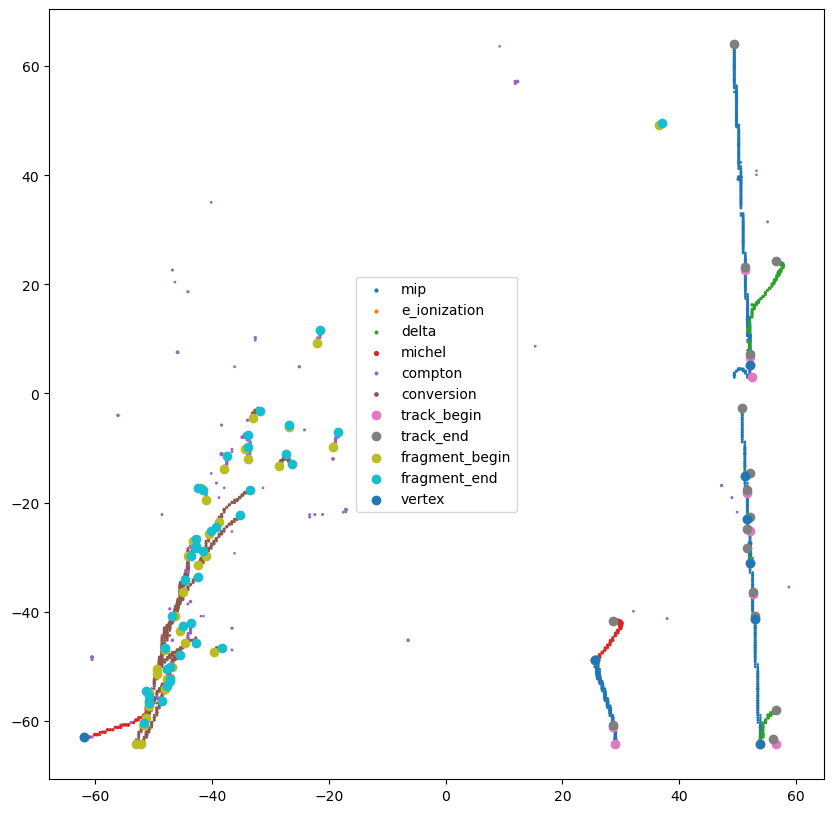

In [16]:
tracks = np.any(event_topology == 1).astype(int)
fig, axs = plt.subplots(figsize=(10,10))
for label in np.unique(event_physics):
    axs.scatter(
        event_y[(event_physics == label)],
        event_z[(event_physics == label)],
        label=physics_labels[label],
        s=event_Q[(event_physics == label)] / 10
    )
axs.scatter(
    event_y[(event_tracklette_begin == 1)],
    event_z[(event_tracklette_begin == 1)],
    label='track_begin'
)
axs.scatter(
    event_y[(event_tracklette_end == 1)],
    event_z[(event_tracklette_end == 1)],
    label='track_end'
)
axs.scatter(
    event_y[(event_fragment_begin == 1)],
    event_z[(event_fragment_begin == 1)],
    label='fragment_begin'
)
axs.scatter(
    event_y[(event_fragment_end == 1)],
    event_z[(event_fragment_end == 1)],
    label='fragment_end'
)
axs.scatter(
    event_y[(event_vertex == 1)],
    event_z[(event_vertex == 1)],
    label='vertex'
)
# axs.set_xlim([-25,-10])
plt.legend()